## Fern Fractals

In [8]:
import numpy as np
import matplotlib.pyplot as plt

The Barnsley Fern is a fractal that resembles the Black Spleenwort species of fern. It is constructed by plotting a sequence of points in the $(x,y)$ plane, starting at $(0,0)$, generated by following the affine transformations $f_1$, $f_2$, $f_2$, and $f_4$ where each transformation is applied to the previous point and chosen at random with probabilities $p_1 = 0.01$, $p_2 = 0.85$, $p_3 = 0.07$, and $p_4 = 0.07$

$$ f_1(x,y) = 
\begin{bmatrix} 
0 & 0 \\
0 & 0.16
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

$$ f_2(x,y) = 
\begin{bmatrix} 
0.85 & 0.04 \\
-0.04 & 0.85
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
0 \\
1.6
\end{bmatrix}
$$

$$ f_3(x,y) = 
\begin{bmatrix} 
0.2 & -.26 \\
0.23 & 0.22
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
0 \\
1.6
\end{bmatrix}
$$

$$ f_4(x,y) = 
\begin{bmatrix} 
-0.15 & 0.28 \\
0.26 & 0.24
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0.44
\end{bmatrix}
$$

### Part 0: Introduction to vector tranformations

The functions listed above are known as vector transformations. They are extremely similar to functions you're used to, but instead of operating on scalars, they operate on vectors. Here is an extremely brief introduction to what vector functions are and how we'll use them in this assignment:

The functions we're used to seeing in math take a number input and produce some other number.
$$ f(x) = y$$

Similarily, vector functions take a vector input and produce some other vector.
$$ f(\ \vec v\ ) = \vec u $$

While programming, you've probably already dealt with something extremely similar. For example this following function is a vector transformation. This function takes a vector as an argument ($\vec{v} = [x, y]$) and returns some other vector ($\vec u = [a,b]$).

    def my_program(x, y):
        a = 3 * x
        b = 5 * y
        return a, b


In the functions defined above, the input vector [x, y] is multiplied by a matrix and added to another vector. Here's an example of how matrix multiplication works.

$$
\begin{bmatrix} 
a & b \\ 
c & d
\end{bmatrix}
\begin{bmatrix} 
x \\ 
y 
\end{bmatrix} = 
\begin{bmatrix}
ax + by \\
cx + dy
\end{bmatrix}
$$

The programming function that correspond to this would look like:
    
    def function(x, y):
        new_x = a*x + b*y
        new_y = c*x + d*y 
        return new_x, new_y

### Part 1: Defining the transformation functions

Let's start by creating functions for the transformations defined above.

In [9]:
# Define f1
def f1(x, y):
    '''parameters:
        x: the value of x
        y: the value of y
        Returns: a tuple that contains (new_x, new_y) '''
    #finds new x from x for function 1
    new_x = 0
    new_y = 0.16*y 
    return new_x, new_y

In [10]:
assert(abs (f1(1,1)[0] - (0)) < 0.0001)
assert(abs (f1(1,1)[1] - (0.16)) < 0.0001)

In [11]:
assert(abs (f1(0,0)[1] - 0 < 0.0001))

In [12]:
# Define f2
def f2(x, y):
    '''parameters:
        x: the value of x
        y: the value of y
        Returns: a tuple that contains (new_x, new_y) '''
    #finds new x from x for function 2
    new_x = 0.85*x + 0.04*y
    new_y = -0.04*x + 0.85*y + 1.6
    return new_x, new_y
    pass

In [13]:
assert(abs (f2(1,1)[0] - (0.89)) < 0.0001)
assert(abs (f2(1,1)[1] - (2.41)) < 0.0001)

In [16]:
assert(abs (f2(0,0)[1] - 1.6 < 0.0001))

In [17]:
# Define f3
def f3(x, y):
    '''parameters:
        x: the value of x
        y: the value of y
        Returns: a tuple that contains (new_x, new_y) '''
    #finds new x from x for function 3
    new_x = 0.2*x - 0.26*y
    new_y = 0.23*x + 0.22*y + 1.6
    return new_x, new_y 

In [18]:
assert(abs (f3(1,1)[0] - (-0.06)) < 0.0001)
assert(abs (f3(1,1)[1] - (2.05)) < 0.0001)

In [20]:
assert(abs (f3(0,0)[1] - 1.6 < 0.0001))

In [21]:
# Define f4
def f4(x, y):
    '''parameters:
        x: the value of x
        y: the value of y
        Returns: a tuple that contains (new_x, new_y) '''
    #finds new x from x for function 4
    new_x = -0.15*x + 0.28*y
    new_y = 0.26*x + 0.24*y + 0.44
    return new_x, new_y 

In [22]:
assert(abs (f4(1,1)[0] - (0.13)) < 0.0001)
assert(abs (f4(1,1)[1] - (0.94)) < 0.0001)

In [24]:
assert(abs (f4(0,0)[1] - 0.44 < 0.0001))

### Part 2: Applying the transformations

Now that we have our transformations defined, let's apply them! Defining this function is not hard, but it's also not intuitive. Below I've outlined one way you can create your `generate_fractal` function.

To give you some intuition into what this function is doing, you can think of it as creating a "picture". We start with an `x` and `y` value and apply one of the transformations above. The tranformation gives us a new `x` and `y` value. We plot this `x` and `y` and then we repeat this process for some number of iterations (N).

Here's a walk through of one way you can implement the function below:
1. Initialize `x` and `y` to 0.
2. Create two arrays (I'll refer to them as `XA` and `YA`) both with length N. As you iterate and apply your transformation functions, you'll store your resulting `x` and `y` values in these arrays. 
3. Create a list of the functions you defined above
4. Make a `for` loop that iterates N times over the following:
    1. Randomly select one of your functions above using the probabilities listed in the introduction, I recommend `np.random.choice(...)`. Make sure your list of probabilities is in the same order as your list of functions. 
    2. Get your new `x`, `y` values from calling the function selected in the previous step with your existing `x`, `y` values
    3. Set the `ith` index of `XA` and `YA` to the new `x` and `y` values respectively. (The `ith` index in this case is whatever number loop you are on)
5. Create a scatter plot of your X and Y value arrays
    1. Use `plt.scatter(....)` and include the arguments `s = 1` and `marker = "o"` to get the cleanest image
    2. Additionally, add color! To do this, create an additional array of length N (I'll refer to this as `color_array`). The numbers in this array are up to you, but should not be all zero).
    3. In your `plt.scatter(...)` call, add arguments `c = color_array` and `cmap = "Greens"`. Once this is working for you, you're welcome to look up and use other colormaps.

<b> I recommend increasing your figure size so your plot is easier to see. Do this by adding `plt.figure(figsize=(10,10))`  before you call `plt.scatter(...)`</b>

When your testing your function, use at least N = 5000, or it'll be extremely hard to tell from the plot if you've done it correctly. 

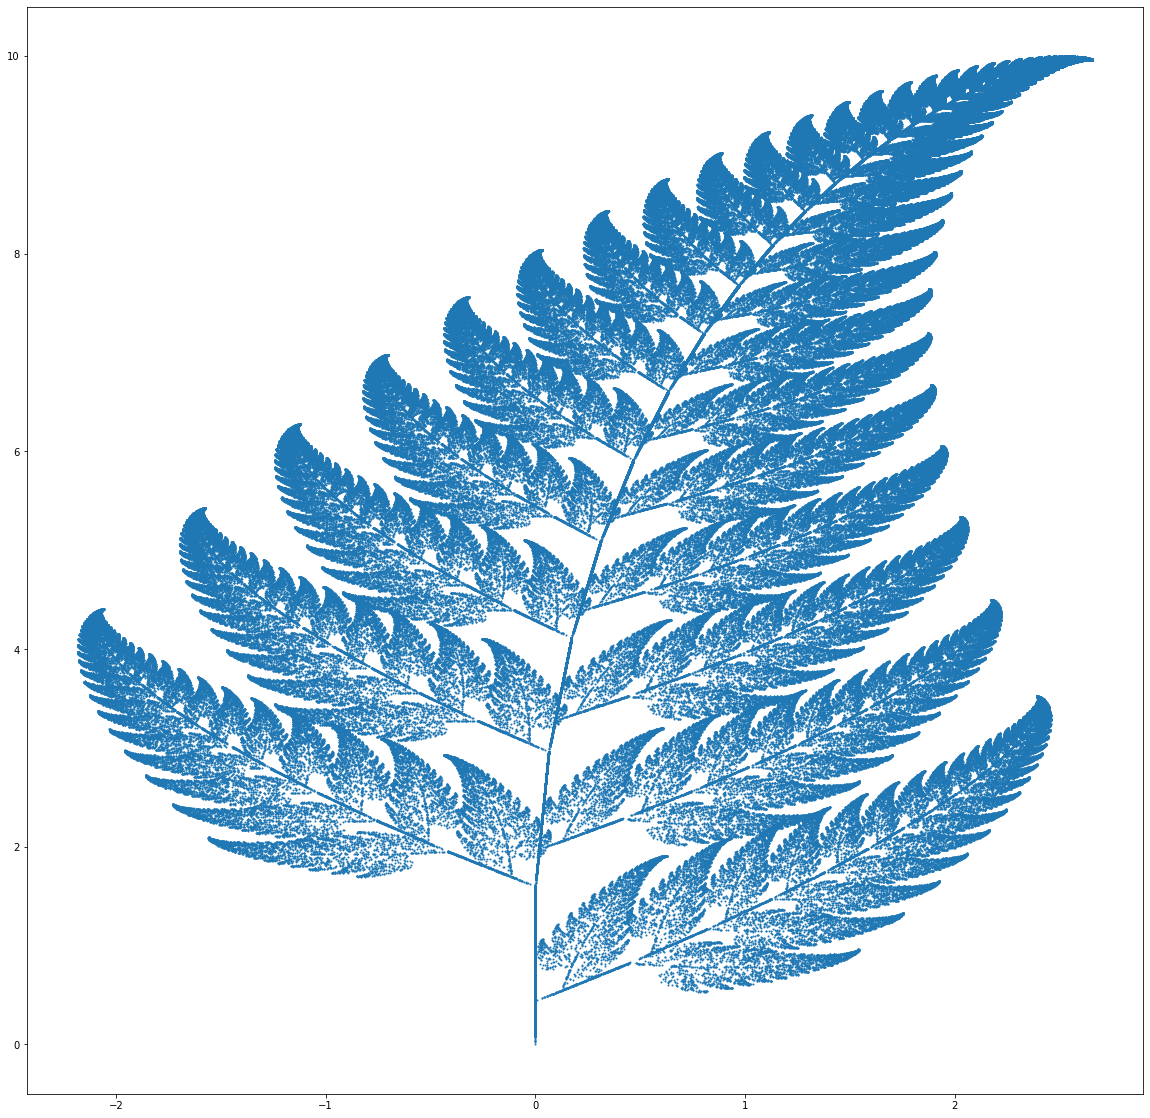

In [29]:
import random
def generate_fractal(N):
    '''Parameter: N, the number of times the process is repeated
    Stores values of x and y and graphs those points on a graph to form a fern fractal
    does not return anything'''
    #initializes x, y, the array that stores the value of x, and the array that stores the value of y
    x = 0
    y = 0
    xA = []
    yA = []
    #randomly chooses one of 4 numbers and creates an array of these random numbers N long
    f = np.random.choice(4,N,p = [0.01,0.85,0.07,0.07])
    #iterates through the process N times and stores each of the x and y values in xA and yA
    for i in range (N):
        xA.append(x)
        yA.append(y)
        if (f[i]==0):
            x,y = f1(x,y)
        elif (f[i]==1):
            x,y = f2(x,y)
        elif (f[i]==2):
            x,y = f3(x,y)
        else:
            x,y = f4(x,y)
    #changes the figure size
    plt.figure(figsize=(20,20))
    #plots the points stored to make the fractal
    plt.scatter(xA,yA,s=1, marker = "o", cmap = "Greens"  )
    pass
#genrates a very large image with lots of detail
generate_fractal(500000)     
    

### Part 3: Run your code with N = 100,000.

In [28]:
# Call your function with N = 100,000. 

# NOTE: This should only take a few seconds to run. 
# If your code takes longer, see if there's anything you can change that'll 
# improve performance (is there anything in the loop that doesn't need to be?)
N = 100000
generate_fractal(N)
